<h1>Fraudulent Credit Card Transactions</h1>

In the following code we want to create and train a machine learning model to detect fraudulent credit card transactions based on a training data set

<h2> STEP 1 | IMPORT DATA & LIBRARIES<h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

<h2> STEP 2 | LOAD DATA<h2>

In [2]:
# training data
data = pd.read_csv("creditcard_2023.csv")

<h2 color = green> STEP 3 | DATA OVERVIEW<h2>

In [3]:
print(data.shape)
data.head()

(568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
data.duplicated().any()

False

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

<h3>Analysis</h3>

Our training dataset consists of:

- Roughly 568.000 entries
- 28 anonymized features representing transaction attributes like time or location
- Class being our Output value (1 = fraudulent || 0 = not fraudulent)
- No missing values


<h2> STEP 4 | EDA ANALYSIS<h2>

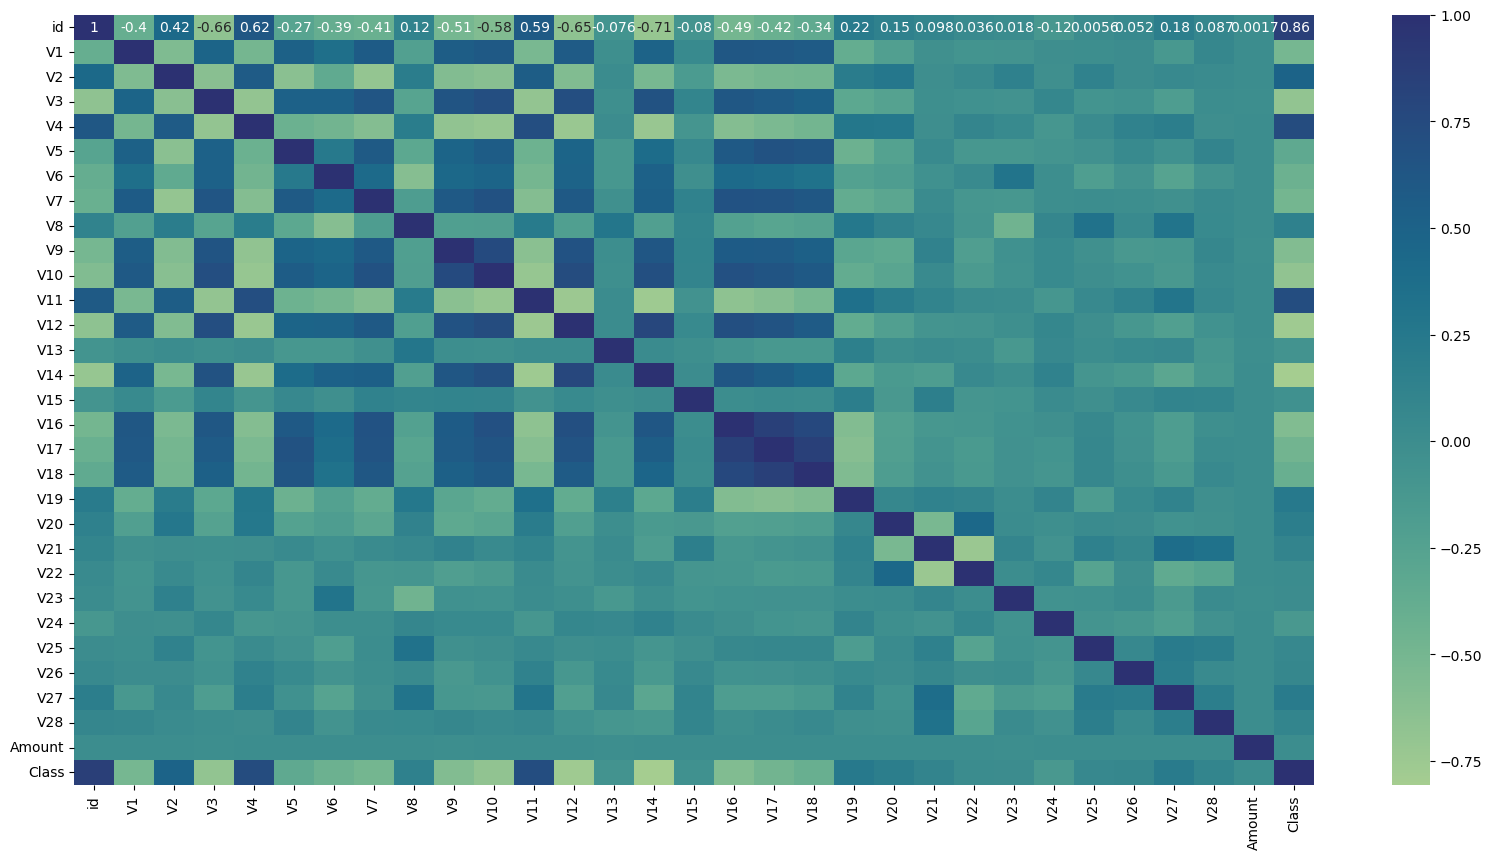

In [6]:
heatmap = plt.figure(figsize=[20,10])
sns.heatmap(data.corr(),cmap="crest", annot=True)
plt.show()

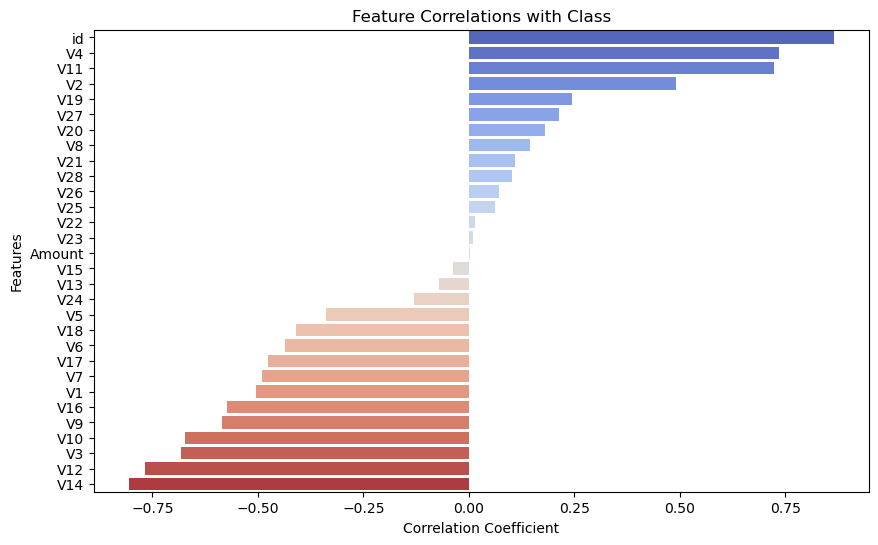

In [7]:
correlation_matrix = data.corr()

# Extracting the correlations with the 'Class' column
class_correlation = correlation_matrix['Class']

# Dropping the 'Class' correlation with itself and sorting the values
class_correlation_sorted = class_correlation.drop('Class').sort_values(ascending=False)

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_correlation_sorted.values, y=class_correlation_sorted.index,
            palette='coolwarm')

# Adding title and labels for clarity
plt.title('Feature Correlations with Class')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Removing the legend as it's unnecessary for this plot
plt.legend([], [], frameon=False)

# Display the plot
plt.show()



<h3>Analysis</h3>

- Some features have a high correlation
- e.g. V17 & V18 or V16 & V17


<Axes: >

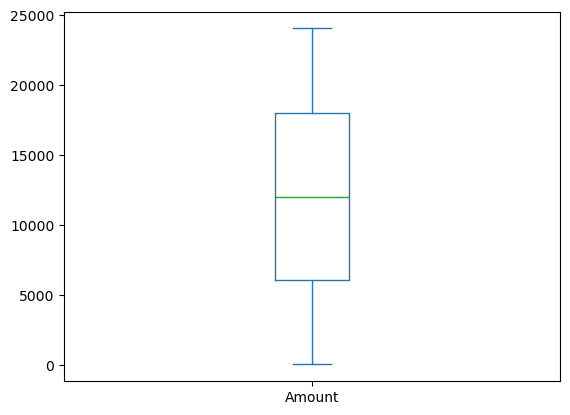

In [ ]:
data["Amount"].plot.box()

c:\Users\gfell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


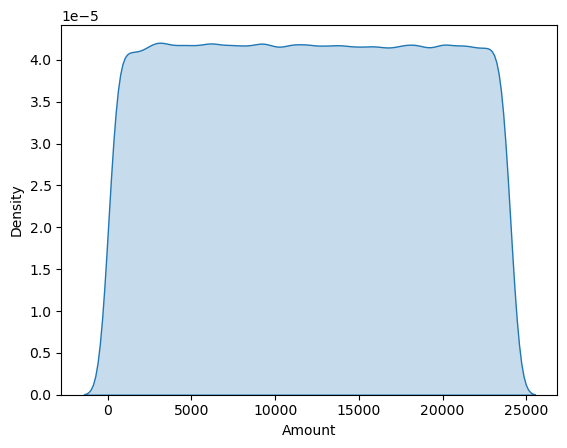

In [ ]:
sns.kdeplot(data=data["Amount"], fill=True)
plt.show()

<h3>Analysis</h3>

- Amount is quite evenly distributed

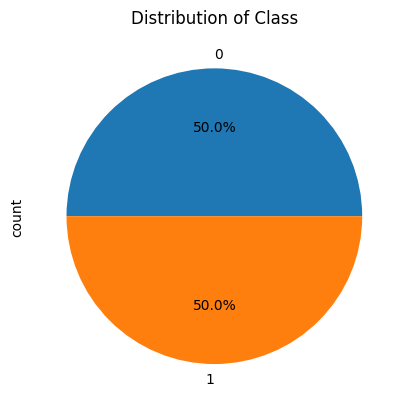

In [ ]:
data["Class"].value_counts().plot.pie(autopct = "%3.1f%%")
plt.title("Distribution of Class")
plt.show()

<h3>Data Preparation</h3>

Next up we want to prepare our data to be used in the machine learning process

Firstly, deviding our features into dependent and independent
- In our dataset the feature "class" is what we want to predict (fraudelent/non-fraudulent) -> dependent feature
- All other features are independent 

In [ ]:
x = data.drop(['id','Class'],axis=1) # Id not important for our use
y = data.Class # Save Class attribute (fraudelent/non-fraudulent in own variable)
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [ ]:
print('Shape of x',x.shape)
print('Shape of y',y.shape)

Shape of x (568630, 29)
Shape of y (568630,)


<h3>Preprocessing</h3>
Standartization to bring features on same scale

In [ ]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x) 
x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


<h3>Modeling</h3>

Now we want to divide the dataset (550k entries) into a training and a testing dataset
- Training: Train our machine learning model
- Testing: Test our machine learning model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y,test_size=0.25,random_state=15,stratify= y) 
# Creating training and testing dataset

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426472, 29)
(142158, 29)
(426472,)
(142158,)


<h3>Building our model</h3>

- For our credit card fraud detection we want to test logic regression firstly:
    * supervised machine learning algorithm
    * used for binary classification tasks (here: fraudulent/non-fraudulent)
    * analyzes the relationship between one or more independent variables
    * perfect for predicitive modeling

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

<h1>ToDo:</h1> IMPLEMENT LINEAR REGRESSION / DECISION TREE (ANALYZE PERFORMANCE) || PUSH STREAMLIT APP 